# Web Scraping Single Page#

***IMPORT LIBRARY UNTUK WEBSCRAPING***



In [ ]:
import lxml
import lxml.etree
import requests
from bs4 import BeautifulSoup
import html5lib
from urllib.request import urlopen

***SETUP URL DAN TARGET PAGE YANG AKAN DI-SCRAPE***

In [ ]:
#inisialisasi url dari website yang akan di-scrape | next kita loop halamannya agar dapat semua konten

#single page scraping
# tokoh = "puan+maharani"
# html = urlopen(f"https://www.detik.com/search/searchall?query={tokoh}&siteid=2&sortby=time&page=1").read()
# print(type(html))
# print(html[1:1000])

In [ ]:
# #parsing keseluruhan data web menjadi format beautifulsoup, single page
soup = BeautifulSoup(html, "lxml")
# print(type(soup))
# print(soup.prettify()[1:1000])

In [ ]:
articles = soup.find_all("article")
# print(articles)
# find hanya mengambil satu objek saja
# find all akan mengambil list dari objek-objek

for a in articles: 
  print (a.find('h2', 'title').get_text())
  # print (a.find('span', attrs={"class":'date'}).get_text().replace("detik","").replace("News","").replace("Bali","").replace("Jateng", "").replace("WIB",""))
  print (a.find('span', attrs={"class":'category'}).get_text())

Legislator PDIP Kawal Kasus Pemerkosaan Anak di Brebes: Harus Diproses Hukum
detikNews
Bertemu Ketua Parlemen Korsel, Jokowi Minta Dukungan Keketuaan RI di ASEAN
detikNews
Jokowi & Puan Terima Kunjungan Ketua Parlemen Korsel, Bahas Apa?
detikNews
Hasil Musra Relawan Jokowi di Jatim: Ganjar Teratas, Prabowo Runner Up
detikNews
Intip Fasilitas Grha Bung Karno Klaten Rp 90 M, Berdaya Tampung 3.000 Orang
detikJateng
Namanya Mencuat di Bursa Capres KIB, Ganjar: Kata Siapa?
detikNews
Dasco Temui Massa Kepala Desa Demo DPR Tuntut Masa Jabatan 9 Tahun
detikNews
Puan Harap Masyarakat Pilih Berobat di RI Ketimbang Luar Negeri
detikNews
Puan ke UMKM di Bali: Perempuan Harus Ikut Maju
detikNews


***Memasukan data yang telah di-scrape ke dalam pandas dataframe***

In [ ]:
import pandas as pd

In [ ]:
# single page dataframe
judul_artikel = []
# tanggal_artikel = []
kategori_artikel = []

articles = soup.find_all("article")

for a in articles:
  judul = a.find('h2', 'title').get_text()
  # tanggal = a.find('span', attrs={"class":'date'})
  kategori = a.find('span', attrs={"class":"category"}).get_text()
  if kategori != "detikJateng" and kategori != 'detikBali':
    judul_artikel.append(judul)
    # tanggal_artikel.append(tanggal)
    kategori_artikel.append(kategori)
    

# judul_dict = {'artikel':judul_artikel,'tanggal':tanggal_artikel}
judul_dict = {'artikel':judul_artikel,'kategori':kategori_artikel}

df = pd.DataFrame(judul_dict, columns = ['artikel','kategori'])

df

,artikel,kategori
0,Legislator PDIP Kawal Kasus Pemerkosaan Anak d...,detikNews
1,"Bertemu Ketua Parlemen Korsel, Jokowi Minta Du...",detikNews
2,Jokowi & Puan Terima Kunjungan Ketua Parlemen ...,detikNews
3,Hasil Musra Relawan Jokowi di Jatim: Ganjar Te...,detikNews
4,"Namanya Mencuat di Bursa Capres KIB, Ganjar: K...",detikNews
5,Dasco Temui Massa Kepala Desa Demo DPR Tuntut ...,detikNews
6,Puan Harap Masyarakat Pilih Berobat di RI Keti...,detikNews
7,Puan ke UMKM di Bali: Perempuan Harus Ikut Maju,detikNews


In [ ]:
#save halaman pertama menjadi csv
df.to_csv("detikcom-1.csv", sep=",")

# Multi Page Web Scraping

mengambil title, link, kategori

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'} #for what? lets find out after this

# article_list = []

# url = 'https://www.detik.com/search/searchall?query=puan+maharani&siteid=2&sortby=time&page=1'

# r = requests.get(url, headers=headers)

# soup = BeautifulSoup(r.text, 'html.parser') #outuput html langsung dijadikan text, jangan lupa untuk menggunakan html.parser

# articles = soup.find_all('article') #'article membungkus seluruh daftar berita dan informasi dalam list yang bisa diakses'

# #mendapatkan kolom data yang kita butuhkan
# #menyimpannya ke dalam dictionary
# for item in articles:
#   article = {
#     'judul' : item.find("h2", {"class" : "title"}).text,
#     'ringkasan' : item.find("p").text,
#     'link' : item.find("a")['href'],
#     'kategori' : item.find("span", {"class" : "category"}).text,
#     'tanggal' : item.find("span", {"class": "date"}).text.replace('detikNews','').replace('detikJateng', '').replace('WIB','')
#   }
#   article_list.append(article)
  
# print(article_list)

# # print(r.status_code) #check the connnection status to url
# # print(soup.title.text) #check on html title 
# # print(len(article)) #jumlah article dalam satu page

In [1]:
import requests
from bs4 import BeautifulSoup

#membuat fungsi untuk melakukan penjelajahan search dan halaman detikcom

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'} #for what? lets find out after this

article_list = []

def getArticles(tag, page):
    url = f'https://www.detik.com/search/searchall?query={tag}&siteid=2&sortby=time&page={page}'
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser') #outuput html langsung dijadikan text, jangan lupa untuk menggunakan html.parser

    articles = soup.find_all('article') #'article membungkus seluruh daftar berita dan informasi dalam list yang bisa diakses'

    for item in articles:
      article = {
        'tag' : tag,
        'judul' : item.find("h2", {"class" : "title"}).text,
        'ringkasan' : item.find("p").text,
        'link' : item.find("a")['href'],
        'kategori' : item.find("span", {"class" : "category"}).text,
        'tanggal' : item.find("span", {"class": "date"}).text.replace('detikNews','').replace('detikJateng', '').replace('WIB','')
      }
      article_list.append(article)

for p in range(1,11):
  getArticles('puan maharani', p)

print(len(article_list))

450


In [2]:
#make it into data frame
import pandas as pd

df = pd.DataFrame(article_list)
# print(df.head())
# df.to_csv("puan100.csv", sep=",")
df.to_csv("puan50.csv", sep=",")
df.to_excel("puan50.xlsx", index=False)

## Word Cloud ##

In [ ]:
#import library 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import path
from PIL import Image


In [ ]:
df = pd.read_csv("puan50.csv", delimiter=",", index_col=0)

df.head()

,tag,judul,ringkasan,link,kategori,tanggal
0,puan maharani,Legislator PDIP Kawal Kasus Pemerkosaan Anak d...,Anggota Fraksi PDIP Paramitha Widya akan menga...,https://news.detik.com/berita/d-6523489/legisl...,detikNews,"Kamis, 19 Jan 2023 10:35"
1,puan maharani,"Bertemu Ketua Parlemen Korsel, Jokowi Minta Du...",Jokowi didampingi Puan Maharani bertemu dengan...,https://news.detik.com/berita/d-6523118/bertem...,detikNews,"Rabu, 18 Jan 2023 23:59"
2,puan maharani,Jokowi & Puan Terima Kunjungan Ketua Parlemen ...,Joko Widodo bersama Ketua DPR RI Puan Maharani...,https://news.detik.com/berita/d-6522980/jokowi...,detikNews,"Rabu, 18 Jan 2023 20:55"
3,puan maharani,Hasil Musra Relawan Jokowi di Jatim: Ganjar Te...,Musra relawan Presiden Jokowi di Jawa Timur se...,https://news.detik.com/pemilu/d-6522005/hasil-...,detikNews,"Rabu, 18 Jan 2023 14:37"
4,puan maharani,Intip Fasilitas Grha Bung Karno Klaten Rp 90 M...,Grha Bung Karno yang dibangun Pemkab Klaten de...,https://www.detik.com/jateng/berita/d-6521421/...,detikJateng,"Rabu, 18 Jan 2023 10:36"


In [ ]:
df[['judul', "tanggal", "kategori"]].head()

,judul,tanggal,kategori
0,Legislator PDIP Kawal Kasus Pemerkosaan Anak d...,"Kamis, 19 Jan 2023 10:35",detikNews
1,"Bertemu Ketua Parlemen Korsel, Jokowi Minta Du...","Rabu, 18 Jan 2023 23:59",detikNews
2,Jokowi & Puan Terima Kunjungan Ketua Parlemen ...,"Rabu, 18 Jan 2023 20:55",detikNews
3,Hasil Musra Relawan Jokowi di Jatim: Ganjar Te...,"Rabu, 18 Jan 2023 14:37",detikNews
4,Intip Fasilitas Grha Bung Karno Klaten Rp 90 M...,"Rabu, 18 Jan 2023 10:36",detikJateng


In [ ]:
# #untuk wordcloud kita harus membuat dataframe menjadi text object
# text = df["judul"].value_counts().to_dict()
# worldCloud = WordCloud(max_font_size=50, max_words=50, background_color="white", width=1000, height=1000).generate_from_frequencies(text)
# plt.figure()
# plt.imshow(worldCloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

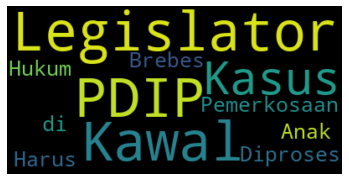

In [ ]:
text = df.judul[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#menghitung jumlah kata di kolom judul
puan = " ".join(kata for kata in df.judul)
print("There are {} words in the combinations of all judul.".format(len(text)))

There are 28905 words in the combinations of all judul.


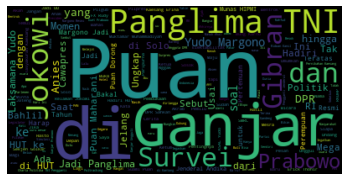

In [ ]:
#mencoba menambahkan stopword 
stopwords = set(STOPWORDS)
stopwords.update(["megawati", "PDIP", "capres", "calon", "dukungan"])

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pdi_mask = np.array(Image.open("/content/pdi.png"))
pdi_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
# def transform_format(val):
#   if val == 0:
#     return 255
#   else:
#     return val

In [ ]:
# transformed_pdi_mask = np.ndarray((pdi_mask.shape[0],pdi_mask.shape[1]), np.int32)
# for i in range(len(pdi_mask)):
#   transformed_pdi_mask[i] = list(map(transform_format, pdi_mask[i]))

ValueError: ignored

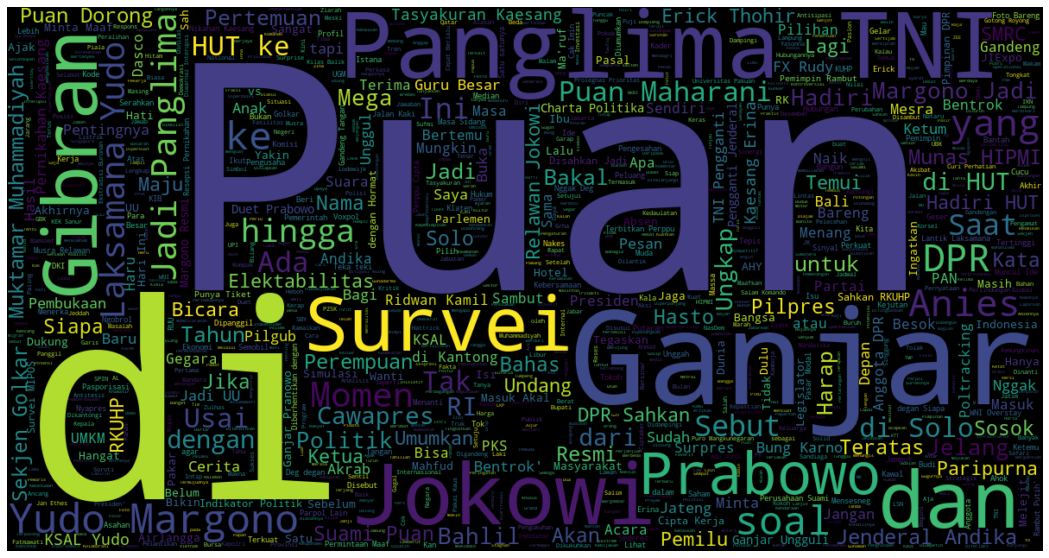

In [ ]:
wc = WordCloud(max_words=1000, mask=pdi_mask, stopwords=stopwords)

wc.generate(text)

wc.to_file("/content/pdi.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

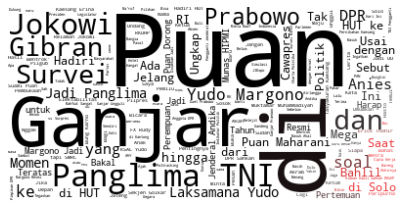

In [ ]:
mask = np.array(Image.open("/content/pdi.png"))
wordcloud_pdi = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(puan)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_pdi.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("/content/puan_cloud.png", format="png")

plt.show()


NEXT belajar bersihin kolom yang akan dijadikan word cloud, membuang kata sambung agar seperti (di, yang, karena, saat, akan, ini, itu, lagi, ke, tak, tidak, hingga, sudah, dari, lihat, jika)